## Questions
* Seasonality in satellited derived sea ice extent over the Greenland sea for the past 20 years
* Seasonality in surface ocean nitrate concentration over the Greenland sea for the past 20 years
* Is there a link and what is the relationship?

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import datetime
import pyproj
import cartopy
import numpy as np

In [2]:
ds = xr.open_mfdataset("AMSR2_ASI_sea_ice_concentration*.nc", combine='by_coords')

## Convert co-ordinates from x,y to lat long

In [3]:
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file

projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)
#+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs
#+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs 
# here is a coordinate pair near the middle of your data set
#x, y = 0.0, -2000000
#x, y = 443962.4864344142,-310865.8796837029
#'+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
# transform x,y to lon/lat

# lon = np.zeros((ds.x.size,ds.y.size))
# lat = np.zeros((ds.x.size,ds.y.size))
xx, yy = np.meshgrid( ds.x.values, ds.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
ds['lon'] = (('y','x'),lon)
ds['lat'] = (('y','x'),lat)
ds

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_8184/3955515765.py:20: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.t

<xarray.Dataset>
Dimensions:              (time: 2580, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-09-01 ... 2019-12-31
Data variables:
    polar_stereographic  (time) |S1 dask.array<chunksize=(30,), meta=np.ndarray>
    z                    (time, y, x) float32 dask.array<chunksize=(30, 1792, 1216), meta=np.ndarray>
    lon                  (y, x) float64 -80.73 -80.69 -80.65 ... 102.4 102.3
    lat                  (y, x) float64 33.96 33.98 34.01 ... 31.44 31.42 31.4
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:52:12 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [61]:
projIn = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file

projOut = pyproj.Proj(init = 'epsg:3411',
    preserve_units=True)
# here is a coordinate pair near the middle of your data set
lon, lat = -35, 60
#'+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
# transform x,y to lon/lat
x, y = pyproj.transform(projIn, projOut, lon, lat)
#answer1: x = 577072.9236190787; y = -3272743.18031452
#amswer2: x = 443962.4864344142; y = -310865.8796837029

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_504/840015512.py:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.trans

## Select only the Greenland Sea
* extent = [-30, 10, 85, 60]
* Min Lat = 60 / -3272743.18031452
* Min Long = -30 / 577072.9236190787
* Max Lat = 85 / -310865.8796837029
* Max Long = 10 / 443962.4864344142

In [4]:
#GLarea = ds.where((ds.x>=443962.4864344142) & (ds.x<=577072.9236190787) & (ds.y <=-310865.8796837029 )  & (ds.y >= -3272743.18031452),drop = True)
GLarea = ds.where((ds.lon>=-10) & (ds.lon<=10) & (ds.lat <=85 )  & (ds.lat >= 70),drop = True)


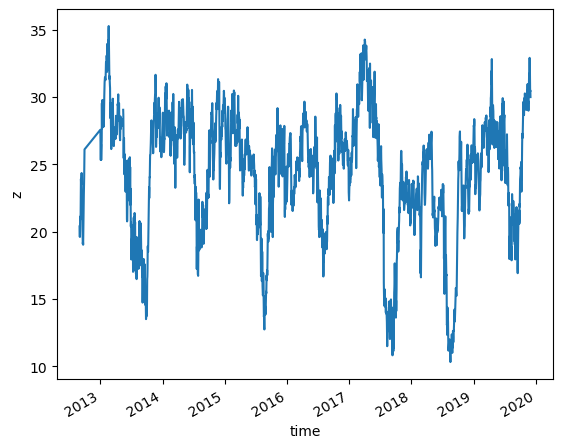

In [5]:
GLarea['z'].sel(time = slice('2003-01-01','2019-12-01')).mean(("x","y")).plot()

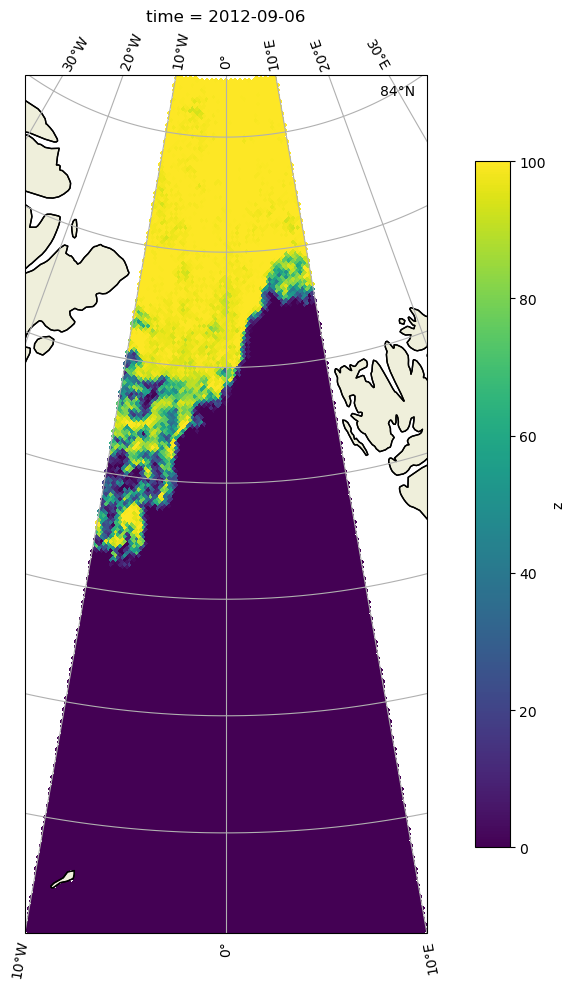

In [6]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GLarea.z.isel(time = 5).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Plot daily data for each year

In [8]:
GL_day = GLarea.mean(("x","y"))
GL_day

<xarray.Dataset>
Dimensions:  (time: 2580)
Coordinates:
  * time     (time) datetime64[ns] 2012-09-01 2012-09-02 ... 2019-12-31
Data variables:
    z        (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    lon      float64 1.721e-15
    lat      float64 75.96

In [13]:
GL_year = GL_day.groupby('time.year')
GL_year[2012]

<xarray.Dataset>
Dimensions:  (time: 30)
Coordinates:
  * time     (time) datetime64[ns] 2012-09-01 2012-09-02 ... 2012-09-30
Data variables:
    z        (time) float32 dask.array<chunksize=(30,), meta=np.ndarray>
    lon      float64 1.721e-15
    lat      float64 75.96

In [20]:
GL_year[2013]['time.dayofyear']

<xarray.DataArray 'dayofyear' (time: 362)>
array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
       225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
       238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
       303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315,
       316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
       329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31

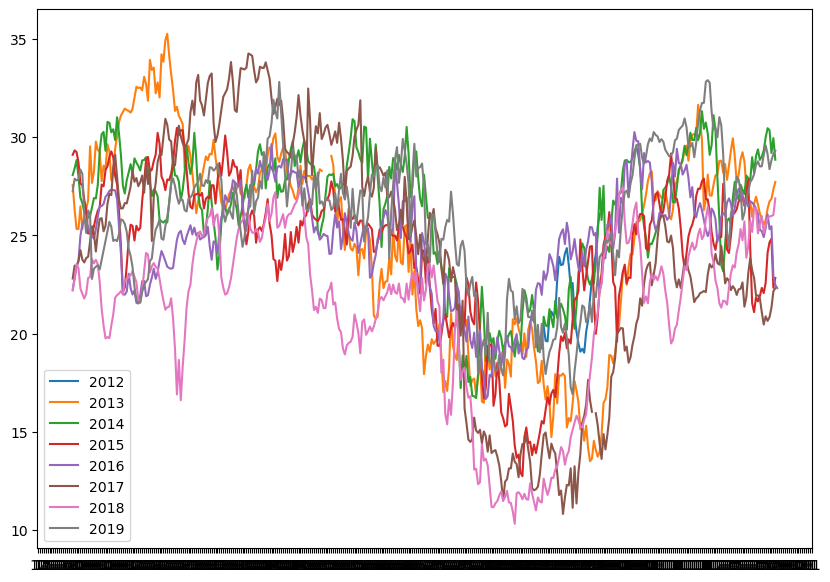

In [25]:
import matplotlib.dates as mdates
fig,ax = plt.subplots(figsize = (10,7))
date_form = mdates.DateFormatter("%m")
for y in range(2012,2020): 
    ax.plot(GL_year[y]['time.dayofyear'], GL_year[y].z, label = y)
ax.legend()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

In [ ]:
import matplotlib.dates as mdates

date_form = mdates.DateFormatter("%d")
a.xaxis.set_major_formatter(date_form)
a.xaxis.set_major_locator(mdates.DayLocator(interval=1))

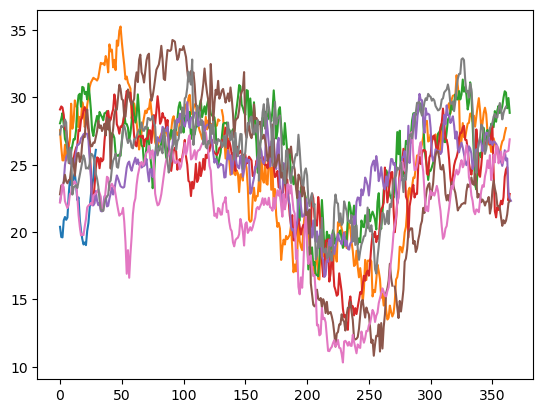

In [15]:
for y in range(2012,2020): 
    plt.plot( range(GL_year[y].time.size), GL_year[y].z) 

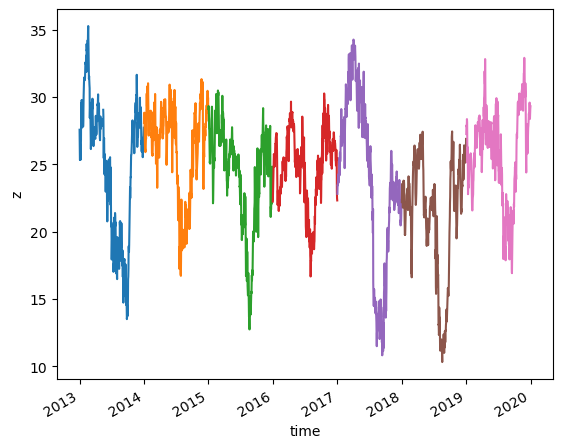

In [54]:
for y in range(2013,2020):
    GL_year[y].mean(("x","y"))


## Create monthly averages for all years

In [8]:
GL_month = GLarea.z.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

In [9]:
area = 6.25**2
Totalarea = area*GLarea.y.size*GLarea.x.size
ice_m = GL_month.where(GL_month >= 15)
var = ice_m/ice_m

In [10]:
extent = ((area*var.sum(dim = ["y","x"]))/Totalarea).values
extent

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


array([0.11049268, 0.1162561 , 0.11367064, 0.11530451, 0.11340132,
       0.11636383, 0.10722493, 0.09027578, 0.09489012, 0.10704539,
       0.11255746, 0.10731471], dtype=float32)

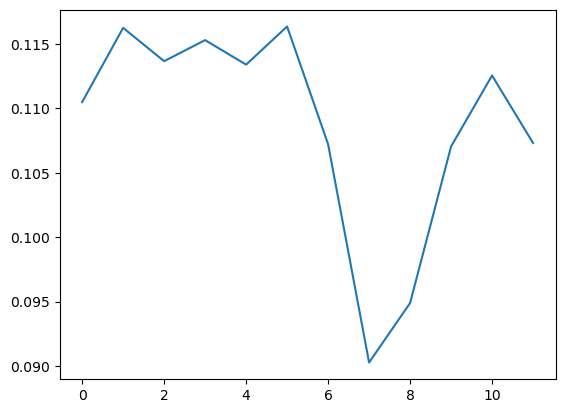

In [11]:
plt.plot(extent)

## Creat daily averages for all years

In [13]:
#ds_plt = ds.z.groupby('time.month').mean(dim = ["time","y","x"], keep_attrs=True)
GL_doy = GLarea.z.groupby('time.dayofyear').mean(dim = ["time","y","x"],keep_attrs=True)
GL_doy

<xarray.DataArray 'z' (dayofyear: 366)>
dask.array<getitem, shape=(366,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

In [16]:
GL_doy.to_netcdf("Daily SIC ASMR2.nc")

In [17]:
daily = xr.open_dataset("Daily SIC ASMR2.nc")

In [18]:
daily

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    z          (dayofyear) float32 ...

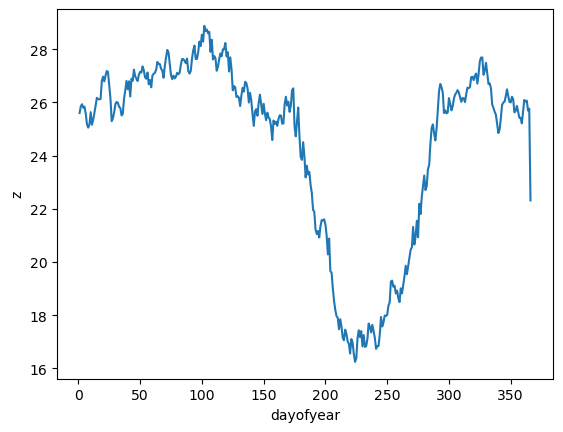

In [20]:
daily.z.plot(x='dayofyear')

## Plot maps of monthly averages for March and September 

In [49]:
GL_map = GLarea.z.groupby('time.month').mean(keep_attrs=True)
GL_map

<xarray.DataArray 'z' (month: 12, y: 236, x: 236)>
dask.array<transpose, shape=(12, 236, 236), dtype=float32, chunksize=(1, 236, 236), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3.156e+05 3.219e+05 3.281e+05 ... 1.778e+06 1.784e+06
  * y        (y) float64 -1.784e+06 -1.778e+06 ... -3.219e+05 -3.156e+05
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


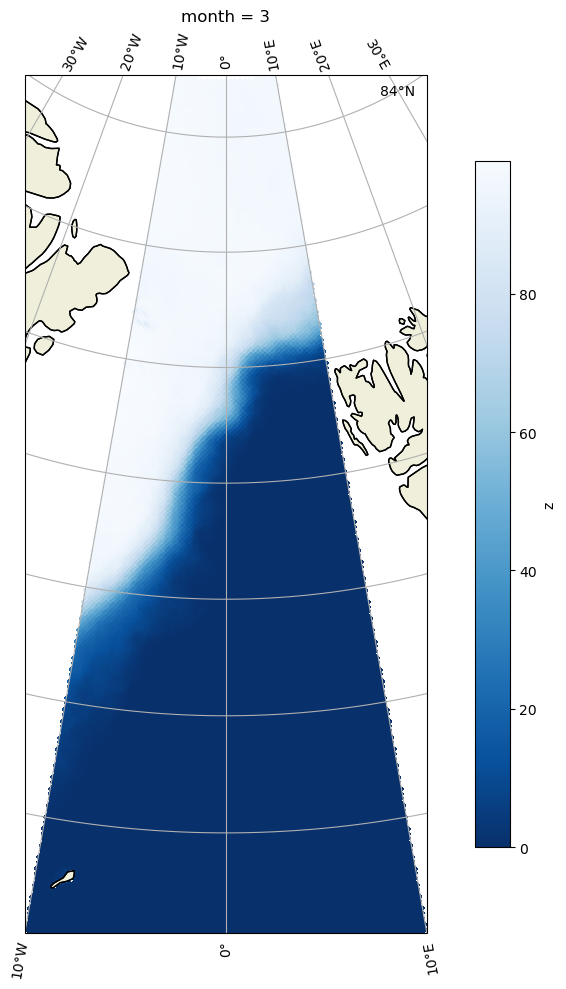

In [52]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GL_map.sel(month = 3).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


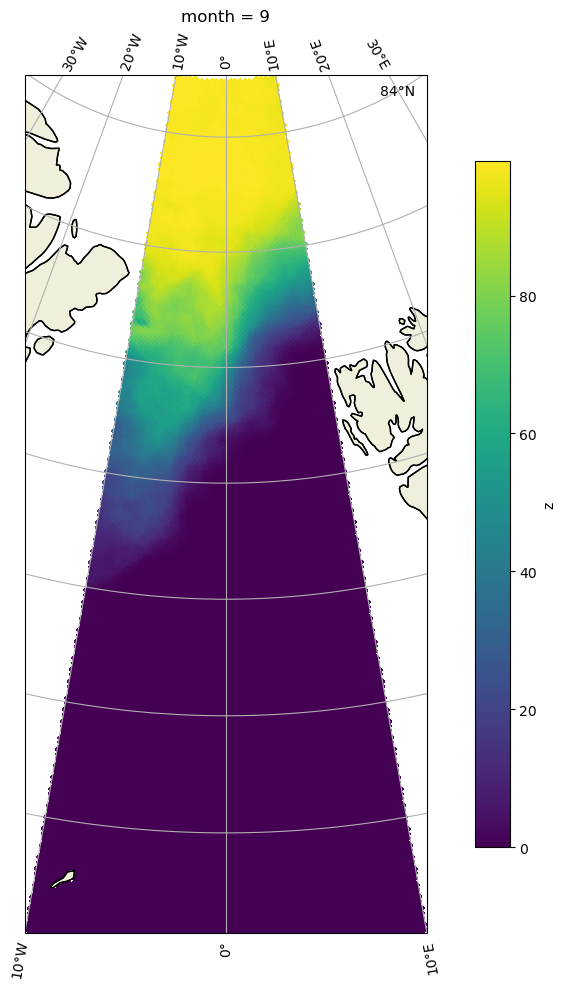

In [51]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GL_map3.sel(month = 9).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()